In [89]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw # Модули работы с изображениями

In [90]:
%matplotlib inline

In [158]:
def KNN(num_tracks=10, min_node=25, max_node=25):
  #верхний левый широта 55.715523, долгота 37.403513
  #нижний правый широта 55.655978, долгота 37.566620
  h_lat=55.715523
  h_lon=37.403513
  
  l_lat=55.655978
  l_lon=37.566620

  tracks_list=[]

  #генерация тестовых данных
  for i in range(num_tracks):
    num_nodes=random.randint(min_node,max_node)

    start_lon=random.uniform(h_lon,h_lon+(l_lon-h_lon)*0.75)
    finish_lon=random.uniform(l_lon,l_lon-(l_lon-h_lon)*0.25)

    tracks_lon=np.random.uniform(start_lon,finish_lon,num_nodes)
    tracks_lat=np.random.uniform(l_lat,h_lat,num_nodes)

    tracks_lon.sort()
    tracks_lat.sort()

    tracks=np.array([[tracks_lon],[tracks_lat]])

    tracks_list.append(tracks)
  
  #отрисовываем основную линию
  m_start_lon=random.uniform(h_lon,h_lon+(l_lon-h_lon)*0.75)
  m_finish_lon=random.uniform(l_lon,l_lon-(l_lon-h_lon)*0.25)

  m_track=np.array([[m_start_lon,m_finish_lon],[l_lat,h_lat]])
  
  plt.figure(figsize=(20,16))
  img=plt.imread("/content/background.PNG")
  fig,ax=plt.subplots()
  ax.imshow(img, extent=[37.403513,37.566620,55.655978,55.715523])

  ax.plot(m_track[0], m_track[1],'m',linewidth = 2)
  plt.show()

  print("Показать наиболее частые маршруты?")
  opt=input()

  plt.figure(figsize=(8,2))
  img=plt.imread("/content/background.PNG")
  fig,ax=plt.subplots()
  ax.imshow(img, extent=[37.403513,37.566620,55.655978,55.715523])
  # отрисовываем вспомогательные линиии
  for i in range(num_tracks):
    ax.plot(tracks_list[i][0][0], tracks_list[i][1][0],'k',linewidth = 2)

  #отрисовываем основную линию
  m_start_lon=random.uniform(h_lon,h_lon+(l_lon-h_lon)*0.75)
  m_finish_lon=random.uniform(l_lon,l_lon-(l_lon-h_lon)*0.25)

  m_track=np.array([[m_start_lon,m_finish_lon],[l_lat,h_lat]])

  ax.plot(m_track[0], m_track[1],'m',linewidth = 2)
  plt.show()

  #метод ближайших соседей
  delta=(l_lon-h_lon)*2
  k=0

  for i in range(num_tracks):
    last=len(tracks_list[i][1][0])-1
    delta_lon1=abs(m_track[0][0]-tracks_list[i][0][0][0])
    delta_lon2=abs(m_track[1][0]-tracks_list[i][1][0][last])

    # print('m_track[0][1]',m_track[0][0])
    # print('tracks_list[i][1][0][last]',tracks_list[i][0][0][last])
    # print('delta_lon1',delta_lon1)
    # print()
    # print('delta_lon2',delta_lon2)
    # print('m_track[1][0]',m_track[1][0])
    # print('tracks_list[i][1][0][last]',tracks_list[i][1][0][last])
    # print()
    # print('delta_lon1+delta_lon2',delta_lon1+delta_lon2)
    # print()
    # print('delta', delta)
    # print('k', k)
    if delta_lon1+delta_lon2 < delta:
       delta=delta_lon1+delta_lon2
       k=i

  print("Оптимизировать траекторию?")
  opt=input()

  plt.figure(figsize=(8,4))
  img=plt.imread("/content/background.PNG")
  fig,ax=plt.subplots()
  ax.imshow(img, extent=[37.403513,37.566620,55.655978,55.715523])

  if opt!=None:
   for i in range(num_tracks):
     if i==k:
      ax.plot(tracks_list[i][0][0], tracks_list[i][1][0],'m',linewidth = 2)
     else:
      ax.plot(tracks_list[i][0][0], tracks_list[i][1][0],'k',linewidth = 2)

<Figure size 1440x1152 with 0 Axes>

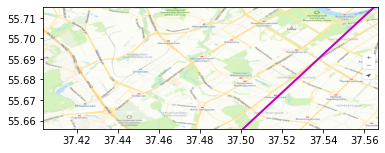

Показать наиболее частые маршруты?



<Figure size 576x144 with 0 Axes>

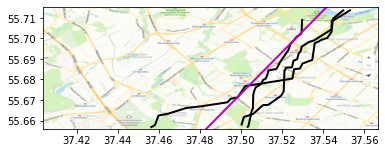

Оптимизировать траекторию?



<Figure size 576x288 with 0 Axes>

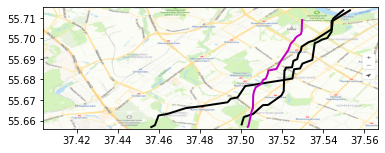

In [165]:
KNN(3)